## Regresiones lineales

In [30]:
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression

In [2]:
def getTestSizeTrainSize(dataFrame, testSplit):
    return m.ceil(shuffledDataFrame.shape[0]*(1-testSplit)), m.floor(shuffledDataFrame.shape[0]*testSplit)

def getTrainData(shuffledDataFrame, trainSize):
    return shuffledDataFrame.iloc[0:trainSize, :8], shuffledDataFrame.iloc[0:trainSize, 8:9]

def getTestData(shuffledDataFrame, trainSize, testSize):
    return shuffledDataFrame.iloc[trainSize:trainSize+trainSize, :8], shuffledDataFrame.iloc[trainSize:trainSize+trainSize, 8:9]

def standarizeDataFrame(dataFrame):
    scaled = pd.DataFrame(scaler.fit_transform(dataFrame))
    scaled.columns = dataFrame.columns
    return scaled

def getScore(model, dataX, dataY):
    return model.score(dataX, dataY)

def getMSE(model, dataX, dataY):
    return np.mean((model.predict(dataX) - dataY)**2).values[0]

def plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

    ax1.scatter(testDataPredictions, testRealData, s=10)
    ax1.plot([testRealData.min(), testRealData.max()], [testRealData.min(), testRealData.max()], 'k--', lw=2)
    ax1.set_title(f"Valores de test \n MSE: {np.round(testMSE,3)}")
    ax1.set_xlabel("Predicciones")
    ax1.set_ylabel("Valores reales")

    ax2.scatter(allDataPredictions, allRealData, s=10)
    ax2.plot([allRealData.min(), allRealData.max()], [allRealData.min(), allRealData.max()], 'k--', lw=2)
    ax2.set_title(f"Todos los valores \n MSE: {np.round(allMSE,3)}")
    ax2.set_xlabel("Predicciones")
    ax2.set_ylabel(f"Valores reales")

    ax1.axis('square')
    ax2.axis('square')
    plt.tight_layout()
    plt.show()

In [3]:
originalDataFrame = pd.read_csv('Database/Concrete_Data_Yeh.csv')
splitRatio = 0.2

### 1. Regresión básica y completa

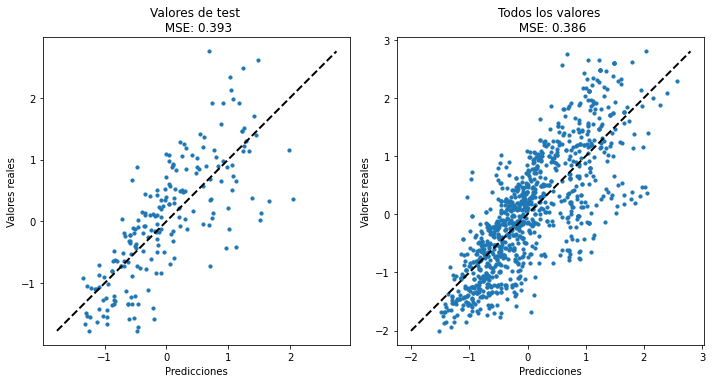

In [4]:
shuffledDataFrame = originalDataFrame.sample(frac=1)
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel1 = linear_model.LinearRegression()
linearModel1.fit(trainX, trainY)

testMSE = getMSE(linearModel1, testX, testY)
allMSE = getMSE(linearModel1, shuffledDataFrame.iloc[:, :8], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel1.predict(testX)
testRealData = testY
allDataPredictions = linearModel1.predict(shuffledDataFrame.iloc[:, :8])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

### 2. Regresión básica con componentes principales

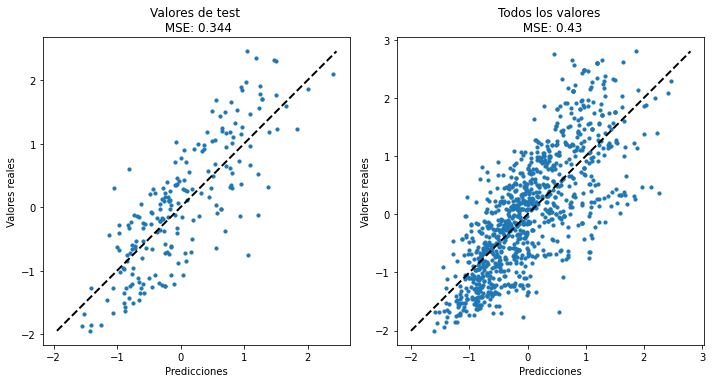

In [6]:
shuffledDataFrame = originalDataFrame.sample(frac=1)
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)
trainX = trainX[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]
testX = testX[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]

linearModel2 = linear_model.LinearRegression()
linearModel2.fit(trainX, trainY)

testMSE = getMSE(linearModel2, testX, testY)
allMSE = getMSE(linearModel2, shuffledDataFrame[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel2.predict(testX)
testRealData = testY
allDataPredictions = linearModel2.predict(shuffledDataFrame[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

### 3. Regresión completa tranformando variables

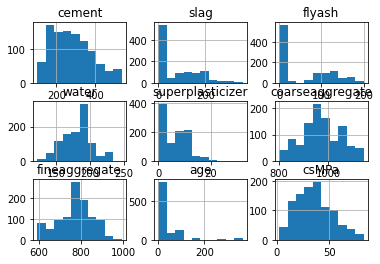

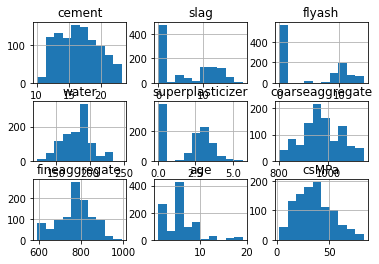

In [7]:
shuffledDataFrame = originalDataFrame.sample(frac=1)

shuffledDataFrame.hist()

shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['flyash'] = np.sqrt(shuffledDataFrame['flyash'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])
shuffledDataFrame['superplasticizer'] = np.sqrt(shuffledDataFrame['superplasticizer'])
shuffledDataFrame['age'] = np.sqrt(shuffledDataFrame['age'])

shuffledDataFrame.hist()
plt.show()

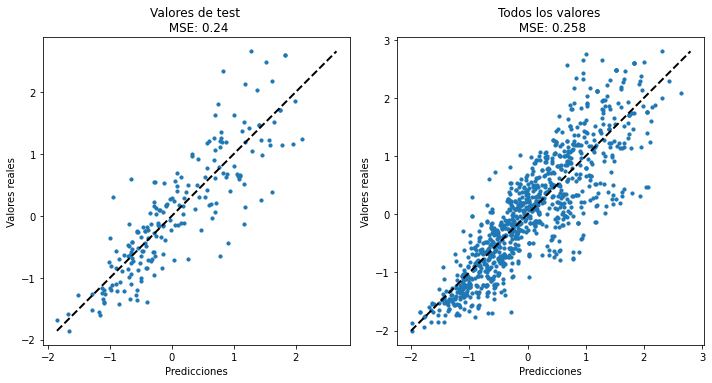

In [9]:
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel3 = linear_model.LinearRegression()
linearModel3.fit(trainX, trainY)

'''
print(f'Training score: {getScore(linearModel3, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel3, trainX, trainY)}')
print(f'Test score: {getScore(linearModel3, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel3, testX, testY)}')
'''

testMSE = getMSE(linearModel3, testX, testY)
allMSE = getMSE(linearModel3, shuffledDataFrame.iloc[:, :8], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel3.predict(testX)
testRealData = testY
allDataPredictions = linearModel3.predict(shuffledDataFrame.iloc[:, :8])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

### 4. Regresión transformando variables y eliminando filas

In [11]:
shuffledDataFrame = originalDataFrame.sample(frac=1)

shuffledDataFrame = shuffledDataFrame.query('slag != 0 and flyash!= 0 and superplasticizer != 0')


shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])


testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel4 = linear_model.LinearRegression()
linearModel4.fit(trainX, trainY)

print(f'Training score: {getScore(linearModel4, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel4, trainX, trainY)}')
print(f'Test score: {getScore(linearModel4, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel4, testX, testY)}')

Training score: 0.6537604607215675
Training MSE: 66.33985941725585
Test score: 0.7350821226356602
Test MSE: 50.673958020868184


### 5. Regresión con valores de la segunda regresión del DataExploration + transformación de las variables

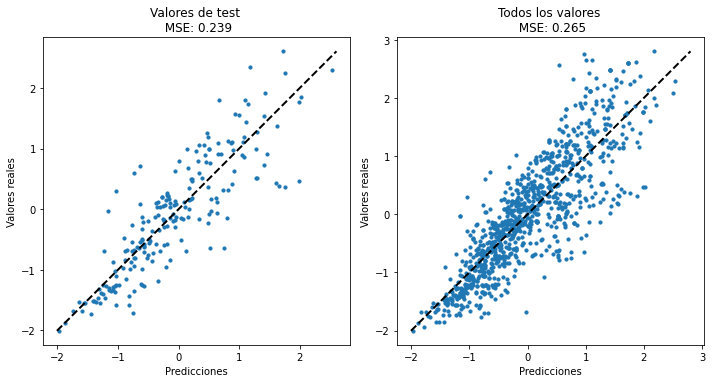

Training score: 0.7360364939359059
Training MSE: 0.2689252909467564
Test score: 0.740568209654112
Test MSE: 0.23927302352834856


In [20]:
shuffledDataFrame = originalDataFrame.sample(frac=1)



shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['flyash'] = np.sqrt(shuffledDataFrame['flyash'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])
#shuffledDataFrame['superplasticizer'] = np.sqrt(shuffledDataFrame['superplasticizer'])
shuffledDataFrame['age'] = np.sqrt(shuffledDataFrame['age'])

shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)


testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)
trainX = trainX[['cement', 'water', 'slag', 'flyash', 'age']]
testX = testX[['cement', 'water', 'slag', 'flyash', 'age']]

linearModel5 = linear_model.LinearRegression()
linearModel5.fit(trainX, trainY)

testMSE = getMSE(linearModel5, testX, testY)
allMSE = getMSE(linearModel5, shuffledDataFrame[['cement', 'water', 'slag', 'flyash', 'age']], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel5.predict(testX)
testRealData = testY
allDataPredictions = linearModel5.predict(shuffledDataFrame[['cement', 'water', 'slag', 'flyash', 'age']])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

print(f'Training score: {getScore(linearModel5, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel5, trainX, trainY)}')
print(f'Test score: {getScore(linearModel5, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel5, testX, testY)}')

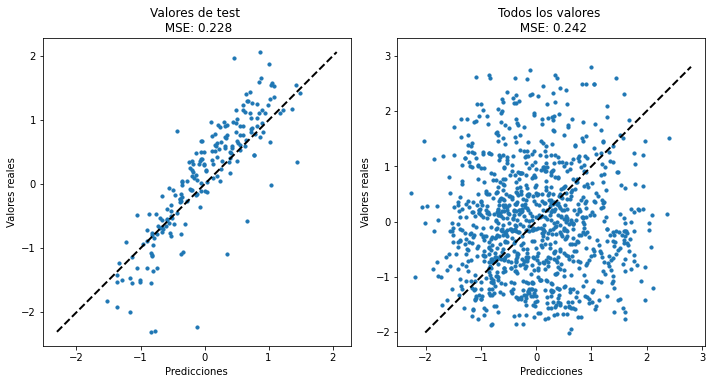

Training score: 0.7774768364762801
Training MSE: 0.243651419951014
Test score: 0.7208323937503667
Test MSE: 0.2277078605835884
        cement      slag    flyash     water  superplasticizer  \
0     2.085165 -1.034755 -0.896039 -0.906009          0.031685   
1     2.085165 -1.034755 -0.896039 -0.906009          0.031685   
2     0.588211  0.987546 -0.896039  2.038289         -1.272954   
3     0.588211  0.987546 -0.896039  2.038289         -1.272954   
4    -0.758544  0.938592 -0.896039  0.515826         -1.272954   
...        ...       ...       ...       ...               ...   
1025  0.078492  0.853498  0.931306 -0.052519          0.719128   
1026  0.499180 -1.034755  1.088124  0.693927          0.825285   
1027 -1.422192  0.972774  1.047238  0.547171          0.483434   
1028 -1.270560  1.178114 -0.896039 -0.241422          0.884145   
1029 -0.074370  0.765343  0.846484  0.895772          0.696489   

      coarseaggregate  fineaggregate       age     csMPa  
0            0.867009

In [43]:
#shuffledDataFrame = originalDataFrame.sample(frac=1)



"""shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['flyash'] = np.sqrt(shuffledDataFrame['flyash'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])
#shuffledDataFrame['superplasticizer'] = np.sqrt(shuffledDataFrame['superplasticizer'])
shuffledDataFrame['age'] = np.sqrt(shuffledDataFrame['age'])"""

#shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)

cbrtThenStdDF = np.cbrt(originalDataFrame);
standardScaler = preprocessing.StandardScaler()
cbrtThenStdDF = pd.DataFrame(standardScaler.fit_transform(cbrtThenStdDF))
cbrtThenStdDF.columns = originalDataFrame.columns


testSize, trainSize = getTestSizeTrainSize(cbrtThenStdDF, splitRatio)

trainX, trainY = getTrainData(cbrtThenStdDF, testSize)
testX, testY = getTestData(cbrtThenStdDF, trainSize, testSize)
trainX = trainX[['cement', 'water', 'slag', 'flyash', 'age']]
testX = testX[['cement', 'water', 'slag', 'flyash', 'age']]

linearModel6 = linear_model.LinearRegression()
linearModel6.fit(trainX, trainY)

testMSE = getMSE(linearModel6, testX, testY)
allMSE = getMSE(linearModel6, cbrtThenStdDF[['cement', 'water', 'slag', 'flyash', 'age']], cbrtThenStdDF.iloc[:, 8:9])

testDataPredictions = linearModel6.predict(testX)
testRealData = testY
allDataPredictions = linearModel6.predict(cbrtThenStdDF[['cement', 'water', 'slag', 'flyash', 'age']])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

print(f'Training score: {getScore(linearModel6, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel6, trainX, trainY)}')
print(f'Test score: {getScore(linearModel6, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel6, testX, testY)}')
